In [1]:
import os
os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
train = pd.read_json("hf://datasets/AlexSham/Toxic_Russian_Comments/" + splits["train"], lines=True)
test = pd.read_json("hf://datasets/AlexSham/Toxic_Russian_Comments/" + splits["test"], lines=True)

/home/timo/rep/TextClassifier/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train

,text,label
0,"видимо в разных регионах называют по разному ,...",0
1,"понятно что это нарушение правил, писать капсл...",1
2,"какие классные, жизненные стихи....",0
3,а и правда-когда его запретили?...,0
4,в соленой воде вирусы живут .ученые изучали со...,0
...,...,...
223456,вова - дима когда же вы подавитесь деньгами???...,0
223457,"какая красота, просто нет слов выразить чувств...",0
223458,вы пост гаи выставити на перекрестке возле 21 ...,0
223459,как -то на лебедей непохожи,0


In [4]:
test

,text,label
0,хорошо пошло!,0
1,"посмотрела, как будто дома побывала. как река ...",0
2,"отдам котят 1,5 месяца в добрые руки.",0
3,"0,5литровая баночка 200р стоит в таганроге. та...",0
4,речь шла о радужных зонтиках над верандой.,0
...,...,...
24824,и ты будь здоров,0
24825,не дорога а прям стекло но правда битое (h),0
24826,спасибо большое. буду ждать хороших новостей. ...,0
24827,активирую установку 🌈🌈🌈👍😎🔥🔥🔥,0


In [5]:
train['class'] = train['label'].map({0: 'non-toxic', 1: 'toxic'})
test['class'] = test['label'].map({0: 'non-toxic', 1: 'toxic'})

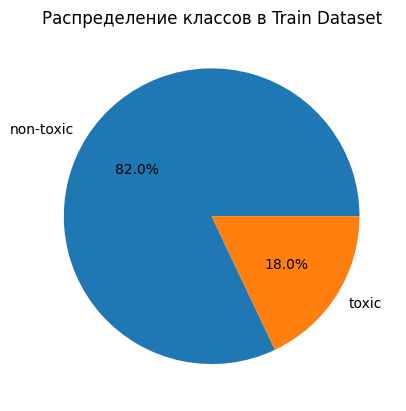

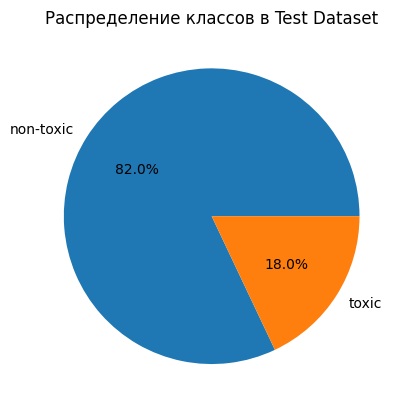

In [6]:
datasets = {"Train Dataset": train, "Test Dataset": test}

for name, df in datasets.items():
    df['class'].value_counts().plot.pie(
        autopct='%1.1f%%',
        ylabel='',
        title=f"Распределение классов в {name}"
    )
    plt.show()

In [7]:
for name, df in datasets.items():
    print(name)
    for label in train['class'].unique():
        print(f"class: {label}")
        print(train[train['class'] == label]['text'].iloc[:10], "\n")

Train Dataset
class: non-toxic
0     видимо в разных регионах называют по разному ,...
2                   какие классные, жизненные стихи....
3                    а и правда-когда его запретили?...
4     в соленой воде вирусы живут .ученые изучали со...
6     ни в одном из близлежащих строительных не нашл...
7     какая дрянь сломала? виноваты родители, выраст...
8     да, висели такие на стене, над кроватью. в люб...
9                           потому что мы так воспитаны
10                                    лапти и не только
11                  привет обмен на дизель без вложений
Name: text, dtype: object 

class: toxic
1     понятно что это нарушение правил, писать капсл...
5     правильно! это же тихановская 26 лет растила и...
13                                     на хуй, безликая
16                  дебилов хватает.надо было с головой
30                    умник хуев. у каждого своё мнение
38      на мыло его дегтярное пустить пидора путинского
47    неправильно вы называете т